# Statistics with Python

## Measures of dispersion or variability


**Dispersion** is an indicator of how far away from the center, we can find the data values. The most common measures of dispersion are **variance**, **standard deviation** and **interquartile range (IQR)**. **Variance** is the standard measure of spread. The **standard deviation** is the square root of the variance. The **variance** and **standard deviation** are two useful measures of spread.



### Variance

-	Variance measures the dispersion of a set of data points around their mean value.
-	It is the mean of the squares of the individual deviations.
-	Variance gives results in the original units squared.



### Standard deviation

-	Standard deviation is the most common used measure of variability.
-	It is the square-root of the variance.
-	For Normally distributed data, approximately 95% of the values lie within 2 s.d. of the mean.
-	Standard deviation gives results in the original units.


### Coefficient of Variation (CV)

-	Coefficient of Variation (CV) is equal to the standard deviation divided by the mean.
-	It is also known as `relative standard deviation`.


### IQR (Interquartile range)

-	A third measure of spread is the **interquartile range (IQR)**.
-	The IQR is calculated using the boundaries of data situated between the 1st and the 3rd quartiles.
-	The interquartile range (IQR) can be calculated as follows:-
       IQR = Q3 – Q1
-	In the same way that the median is more robust than the mean, the IQR is a more robust measure of spread than variance and standard deviation and should therefore be preferred for small or asymmetrical distributions.
-	It is a robust measure of spread.



### Measures of shape

Now, we will take a look at measures of shape of distribution. There are two statistical measures that can tell us about the shape of the distribution. These measures are **skewness** and **kurtosis**. These measures can be used to convey information about the shape of the distribution of the dataset.


### Skewness
-	**Skewness** is a measure of a distribution's symmetry or more precisely lack of symmetry.
-	It is used to mean the absence of symmetry from the mean of the dataset.
-	It is a characteristic of the deviation from the mean.
-	It is used to indicate the shape of the distribution of data.


#### Negative skewness

-	Negative values for skewness indicate negative skewness.
-	In this case, the data are skewed or tail to left.
-	By skewed left, we mean that the left tail is long relative to the right tail.
-	The data values may extend further to the left but concentrated in the right.
-	So, there is a long tail and distortion is caused by extremely small values which pull the mean downward so that it is less than the median.
-	Hence, in this case we have
      **Mean < Median < Mode**
      

#### Zero skewness

-	Zero skewness means skewness value of zero.
-	It means the dataset is symmetrical.
-	A data set is symmetrical if it looks the same to the left and right to the center point.
-	The dataset looks bell shaped or symmetrical.
-	A perfectly symmetrical data set will have a skewness of zero.
-	So, the normal distribution which is perfectly symmetrical has a skewness of 0.
-	So, in this case, we have
      **Mean = Median = Mode**
      

#### Positive skewness

-	Positive values for skewness indicate positive skewness.
-	The dataset are skewed or tail to right.
-	By skewed right, we mean that the right tail is long relative to the left tail.
-	The data values are concentrated in the right.
-	So, there is a long tail to the right that is caused by extremely large values which pull the mean upward so that it is greater than the median.
-	So, we have
       **Mean > Median > Mode**
       

#### Reference range on skewness values

The rule of thumb for skewness values are:

-	If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
-	If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed.
-	If the skewness is less than -1 or greater than 1, the data are highly skewed.


##  Import libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Ignore warnings

In [45]:
import warnings
warnings.filterwarnings('ignore')

# Lab Tasks
1. Read file Match.csv

In [46]:
file_path = "Match.csv"

df = pd.read_csv(file_path)
print(df.head())

   Match_Id Match_Date  Team_Name_Id  Opponent_Team_Id  Season_Id  \
0    335987  18-Apr-08             2                 1          1   
1    335988  19-Apr-08             4                 3          1   
2    335989  19-Apr-08             6                 5          1   
3    335990  20-Apr-08             7                 2          1   
4    335991  20-Apr-08             1                 8          1   

                                   Venue_Name  Toss_Winner_Id Toss_Decision  \
0                       M Chinnaswamy Stadium               2         field   
1  Punjab Cricket Association Stadium, Mohali               3           bat   
2                            Feroz Shah Kotla               5           bat   
3                            Wankhede Stadium               7           bat   
4                                Eden Gardens               8           bat   

   IS_Superover  IS_Result  Is_DuckWorthLewis    Win_Type  Won_By  \
0             0          1               

2. View summary of dataset

In [47]:
summary = df.info()
print(summary)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Match_Id             577 non-null    int64  
 1   Match_Date           577 non-null    object 
 2   Team_Name_Id         577 non-null    int64  
 3   Opponent_Team_Id     577 non-null    int64  
 4   Season_Id            577 non-null    int64  
 5   Venue_Name           577 non-null    object 
 6   Toss_Winner_Id       577 non-null    int64  
 7   Toss_Decision        577 non-null    object 
 8   IS_Superover         577 non-null    int64  
 9   IS_Result            577 non-null    int64  
 10  Is_DuckWorthLewis    577 non-null    int64  
 11  Win_Type             577 non-null    object 
 12  Won_By               568 non-null    float64
 13  Match_Winner_Id      574 non-null    float64
 14  Man_Of_The_Match_Id  574 non-null    float64
 15  First_Umpire_Id      577 non-null    int

3. Check if there are any missing values

In [48]:
missing_values = pd.isnull(df)
# used the sum() function to count the missing values in each column.
missing_count = missing_values.sum()

print("Columns with missing values:")
print(missing_count[missing_count > 0])


Columns with missing values:
Won_By                 9
Match_Winner_Id        3
Man_Of_The_Match_Id    3
dtype: int64


4. Describe dataset

In [49]:

dataset_info = df.describe()
print(dataset_info)


            Match_Id  Team_Name_Id  Opponent_Team_Id   Season_Id  \
count     577.000000    577.000000        577.000000  577.000000   
mean   591635.963605      5.102253          5.211438    5.029463   
std    196366.642396      3.062703          3.024841    2.486247   
min    335987.000000      1.000000          1.000000    1.000000   
25%    419140.000000      3.000000          3.000000    3.000000   
50%    548353.000000      5.000000          5.000000    5.000000   
75%    734004.000000      7.000000          7.000000    7.000000   
max    981024.000000     13.000000         13.000000    9.000000   

       Toss_Winner_Id  IS_Superover   IS_Result  Is_DuckWorthLewis  \
count      577.000000    577.000000  577.000000         577.000000   
mean         5.192374      0.010399    0.994801           0.025997   
std          3.024680      0.101530    0.071981           0.159263   
min          1.000000      0.000000    0.000000           0.000000   
25%          3.000000      0.000000  

5. Check and plot skewness (positive, negative, zero) of dataset on following columns (use mean ,median, mode)
* Season_Id
* Toss_Winner_Id
* Match_Winner_Id
* Won_By
* Man_Of_The_Match_Id

Column: Season_Id
Mean: 5.02946273830156, Median: 5.0, Mode: 6
Skewness Type: Zero Skew



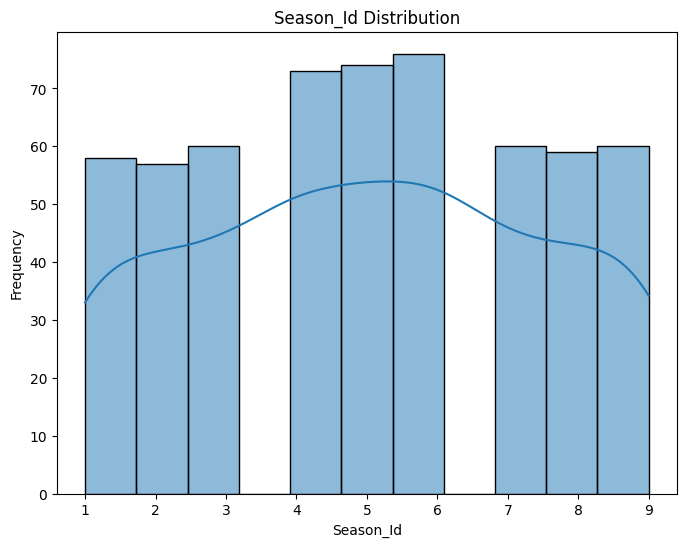

Column: Toss_Winner_Id
Mean: 5.192374350086655, Median: 5.0, Mode: 7
Skewness Type: Zero Skew



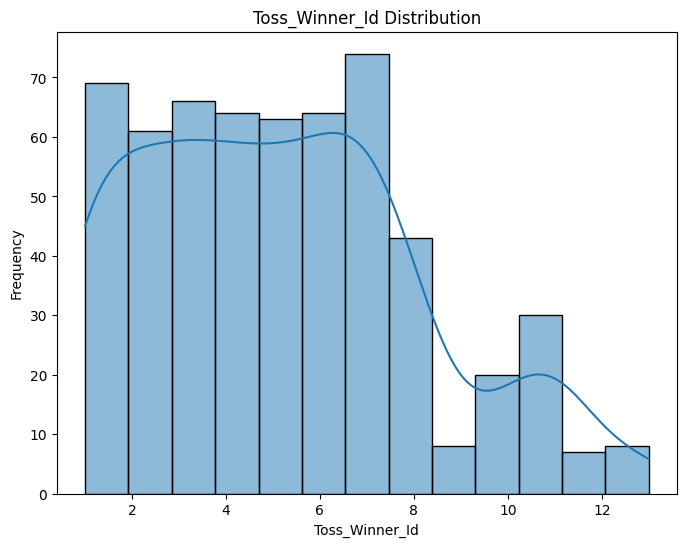

Column: Match_Winner_Id
Mean: 4.991289198606272, Median: 5.0, Mode: 7.0
Skewness Type: Negative Skew



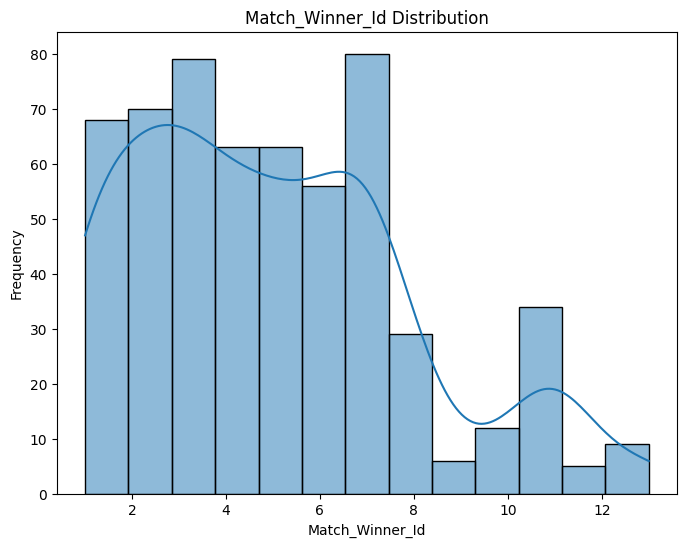

Column: Won_By
Mean: 17.350352112676056, Median: 8.0, Mode: 7.0
Skewness Type: Positive Skew



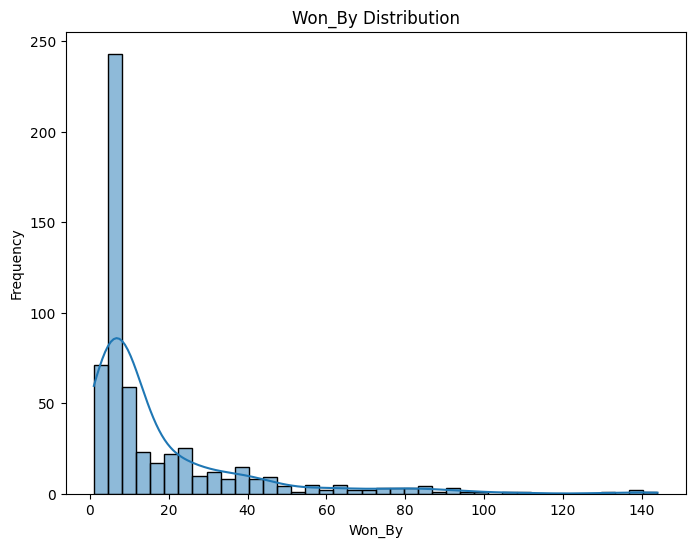

Column: Man_Of_The_Match_Id
Mean: 139.7822299651568, Median: 105.5, Mode: 162.0
Skewness Type: Zero Skew



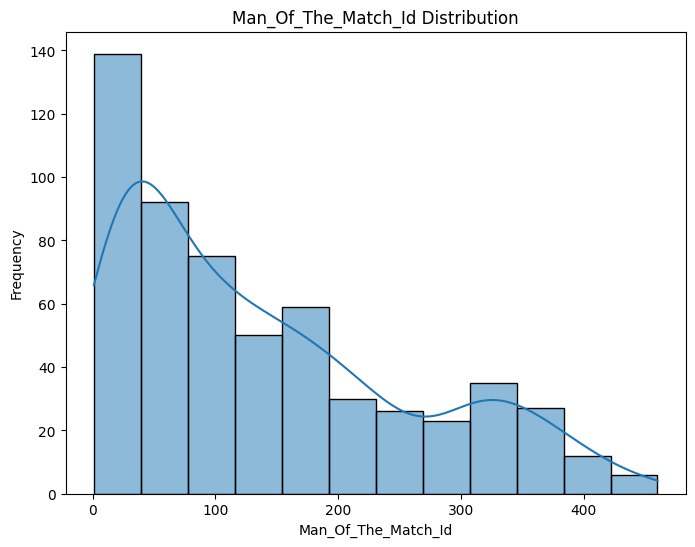

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns to analyze
columns_to_analyze = ['Season_Id', 'Toss_Winner_Id', 'Match_Winner_Id', 'Won_By', 'Man_Of_The_Match_Id']

# Function to determine skewness type
def determine_skewness_type(mean, median, mode):
    if mean < median < mode:
        return "Negative Skew"
    elif mean > median > mode:
        return "Positive Skew"
    else:
        return "Zero Skew"

for column in columns_to_analyze:
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode().iloc[0]

    skewness_type = determine_skewness_type(mean, median, mode)

    # Printing the results
    print(f"Column: {column}")
    print(f"Mean: {mean}, Median: {median}, Mode: {mode}")
    print(f"Skewness Type: {skewness_type}\n")

    # Creating a histogram to visualize the distribution
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(column + " Distribution")  # Use + to concatenate the title string
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()


6. Do computation of measures of dispersion or variability (min, max, range, varience, standard deviation, median Q2 or 50th percentile, 75th percentile and 25th percentile, interuartile range, draw box plot) for all of following columns

* Season_Id
* Toss_Winner_Id
* Match_Winner_Id
* Won_By
* Man_Of_The_Match_Id

Column: Season_Id
Minimum: 1
Maximum: 9
Range: 8
Variance: 6.1814221066820725
Standard Deviation: 2.4862465900795265
Median (Q2): 5.0
25th Percentile (Q1): 3.0
75th Percentile (Q3): 7.0
Interquartile Range (IQR): 4.0



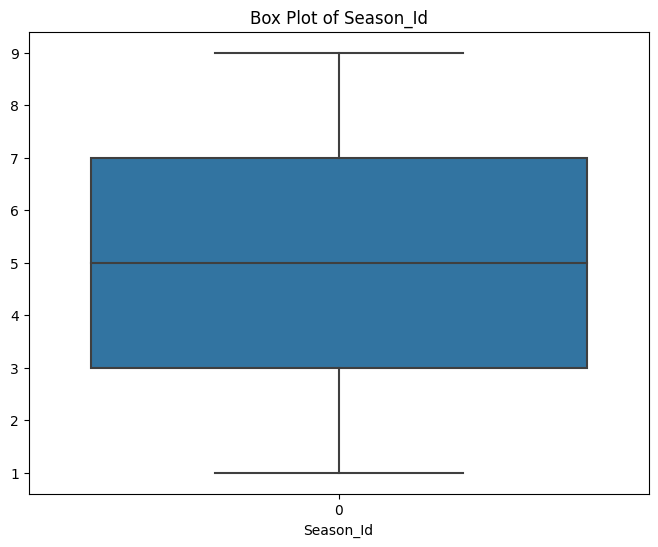

Column: Toss_Winner_Id
Minimum: 1
Maximum: 13
Range: 12
Variance: 9.148691748507607
Standard Deviation: 3.024680437419399
Median (Q2): 5.0
25th Percentile (Q1): 3.0
75th Percentile (Q3): 7.0
Interquartile Range (IQR): 4.0



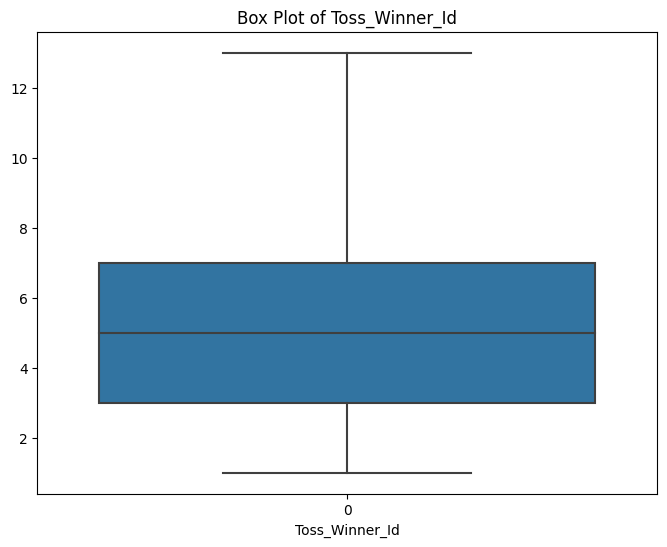

Column: Match_Winner_Id
Minimum: 1.0
Maximum: 13.0
Range: 12.0
Variance: 9.031337602082079
Standard Deviation: 3.005218395072491
Median (Q2): 5.0
25th Percentile (Q1): 3.0
75th Percentile (Q3): 7.0
Interquartile Range (IQR): 4.0



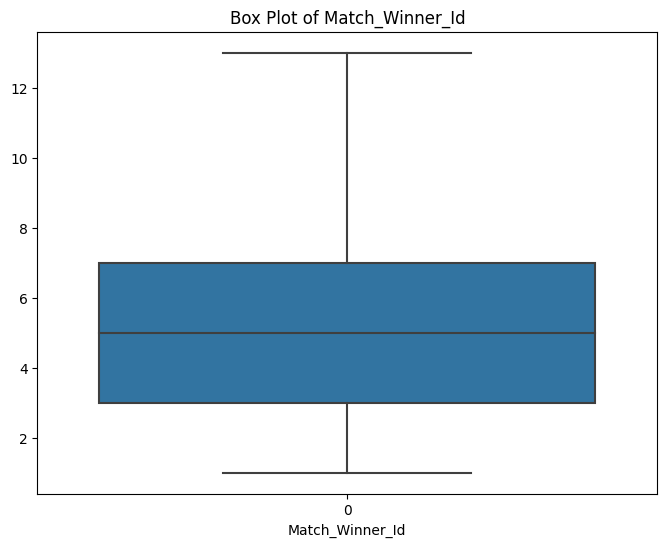

Column: Won_By
Minimum: 1.0
Maximum: 144.0
Range: 143.0
Variance: 479.9705113396427
Standard Deviation: 21.908229306350677
Median (Q2): 8.0
25th Percentile (Q1): 6.0
75th Percentile (Q3): 21.0
Interquartile Range (IQR): 15.0



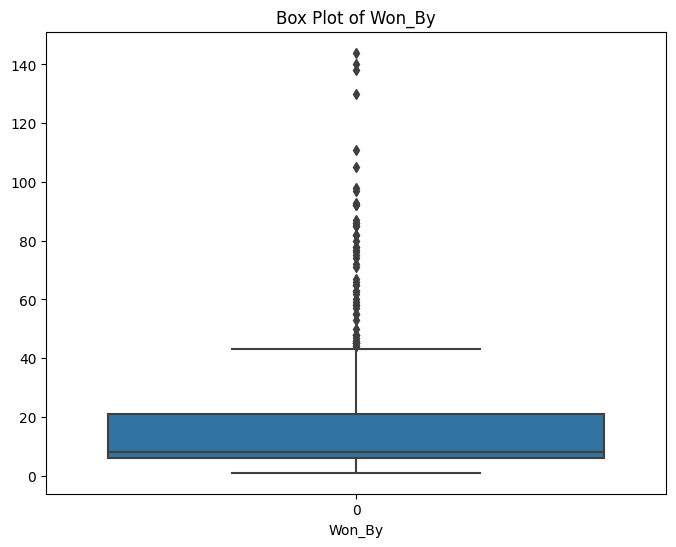

Column: Man_Of_The_Match_Id
Minimum: 1.0
Maximum: 460.0
Range: 459.0
Variance: 13760.44987564685
Standard Deviation: 117.304943952277
Median (Q2): 105.5
25th Percentile (Q1): 40.0
75th Percentile (Q3): 209.5
Interquartile Range (IQR): 169.5



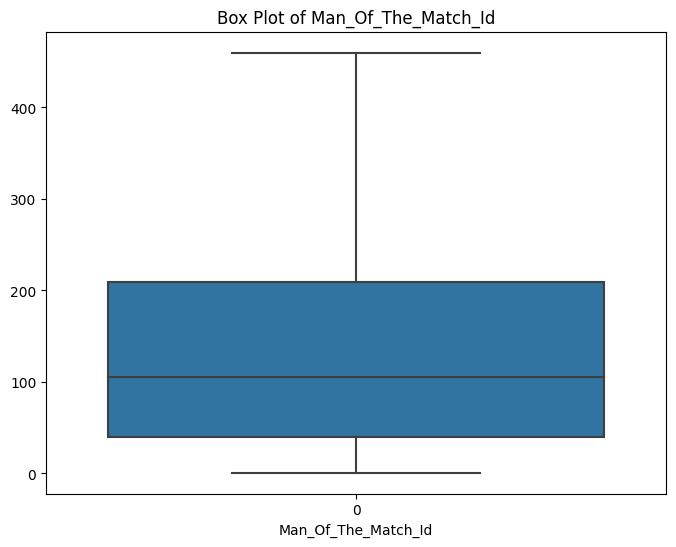

In [58]:

columns_to_analyze = ['Season_Id', 'Toss_Winner_Id', 'Match_Winner_Id', 'Won_By', 'Man_Of_The_Match_Id']

# Function to compute measures of dispersion and draw box plots
def compute_and_plot_dispersion(column_name):
    data = df[column_name]

    # Measures of dispersion
    minimum = data.min()
    maximum = data.max()
    data_range = maximum - minimum
    variance = data.var()
    std_deviation = data.std()
    median = data.median()
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25

    # Displaying measures of dispersion
    print(f"Column: {column_name}")
    print(f"Minimum: {minimum}")
    print(f"Maximum: {maximum}")
    print(f"Range: {data_range}")
    print(f"Variance: {variance}")
    print(f"Standard Deviation: {std_deviation}")
    print(f"Median (Q2): {median}")
    print(f"25th Percentile (Q1): {q25}")
    print(f"75th Percentile (Q3): {q75}")
    print(f"Interquartile Range (IQR): {iqr}\n")

    # Drawing a box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(data)
    plt.title(f"Box Plot of {column_name}")
    plt.xlabel(column_name)
    plt.show()

# Computing measures of dispersion and draw box plots for each column
for column in columns_to_analyze:
    compute_and_plot_dispersion(column)


7. Check and print skewness of following columns

* Season_Id ^ Toss_Winner_Id
* Match_Winner_Id + Won_By
* Man_Of_The_Match_Id

In [61]:
skew1 = (df['Season_Id'] ** df['Toss_Winner_Id']).skew()
print('Skew 1:',skew1)

skew2 = (df['Match_Winner_Id'] + df['Match_Winner_Id']).skew()
print('Skew 2:',skew2)

skew3 = df['Man_Of_The_Match_Id'].skew()
print('Skew 3:',skew3)

Skew 1: 8.207002135912395
Skew 2: 0.6599845966401926
Skew 3: 0.8163710200696908


8. Create bar chart or histogram of city_name column to show occurance of cities

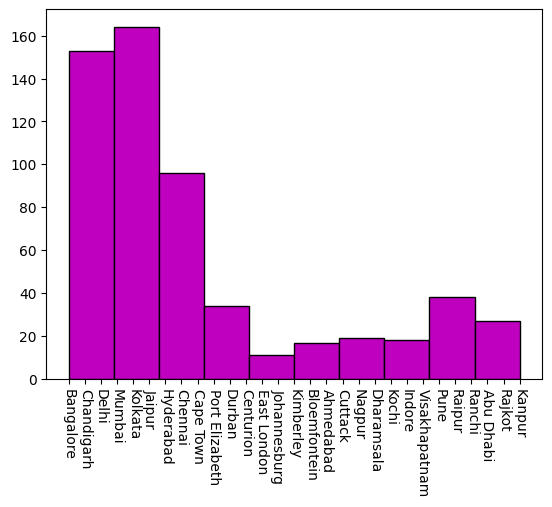

In [62]:
cities = df['City_Name']

plt.hist(cities, edgecolor = "k", color = 'm')
plt.xticks(rotation = -90)
plt.show()